In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import cohen_kappa_score


Bad key text.latex.preview in file /Users/riesacassano/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/riesacassano/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/riesacassano/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a 

Load the data and the ground truths.

In [3]:
data = pd.read_csv('data/responses_binarized_long.csv')
gt_periodic = pd.read_csv('data/ground_truth_phrase_boundaries_periodic.csv')
gt_tracked = pd.read_csv('data/ground_truth_phrase_boundaries_tracked.csv')

In [4]:
data.head()

,exp_subject_id,scram_cond,stim_num,run,time,response
0,377777,8B,2,1,0,0
1,377777,8B,2,1,1,0
2,377777,8B,2,1,2,0
3,377777,8B,2,1,3,0
4,377777,8B,2,1,4,0


In [5]:
gt_periodic.head()

,scram_cond,stim_num,time,response
0,1B,1,0,0
1,1B,1,1,0
2,1B,1,2,0
3,1B,1,3,0
4,1B,1,4,0


In [5]:
subject_ids = data['exp_subject_id'].unique()

In [117]:
conditions = ['intact', '8B', '2B', '1B']
c = conditions[2]
stim_num = 2

# get the ground truth in array form
#this_gt = gt_periodic[gt_periodic['scram_cond']==c]
this_gt = gt_tracked[gt_tracked['scram_cond']==c]
this_gt = this_gt[this_gt['stim_num']==stim_num]
gt_array = this_gt['response'].to_numpy()

# get the data in matrix form
this_data = data[data['scram_cond']==c]
this_data = this_data[this_data['stim_num']==stim_num]
this_data = this_data[this_data['run']==2] # select only run 2
data_array = this_data['response'].to_numpy()
data_array = np.reshape(data_array, (subject_ids.shape[0], gt_array.shape[0]))

In [37]:
print(gt_array.shape)
print(data_array.shape)

(86,)
(43, 86)


In this form, the data are in a matrix of size `number of subjects x number of seconds`. We came back into python to do lagged "correlation" for each subject with the ground truth. (We're not using Pearson correlation, we're using Cohen's kappa).

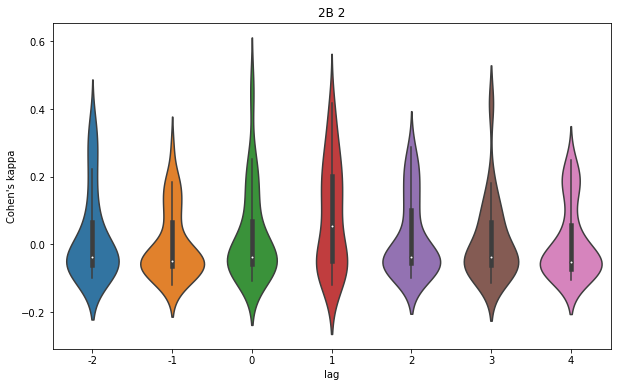

In [118]:
lags = range(-2,5)
kappa_values = np.zeros((subject_ids.shape[0],len(lags)))

for i in range(subject_ids.shape[0]):
#for i in range(1):
    this_sub = data_array[i,:]
    
    for l in range(len(lags)):
        lag = lags[l]
    
        if lag > 0:
            this_sub_crop = this_sub[lag:]
            this_gt = gt_array[:-lag]
            
        elif lag < 0:
            this_sub_crop = this_sub[:lag]
            this_gt = gt_array[-lag:]
        
        elif lag == 0:
            this_sub_crop = this_sub
            this_gt = gt_array
            
        kappa_values[i,l] = cohen_kappa_score(this_sub_crop,this_gt)

fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(data = kappa_values)
ax.set_xticklabels(lags)
ax.set_xlabel('lag')
ax.set_ylabel("Cohen's kappa")
ax.set_title('%s %d'%(c, stim_num))
#plt.savefig('plots/%s_%d_lag_kappa.png'%(c,stim_num),dpi=300);
#plt.savefig('plots/%s_%d_lag_kappa_periodic.png'%(c,stim_num),dpi=300);
plt.savefig('plots/%s_%d_lag_kappa_tracked.png'%(c,stim_num),dpi=300);

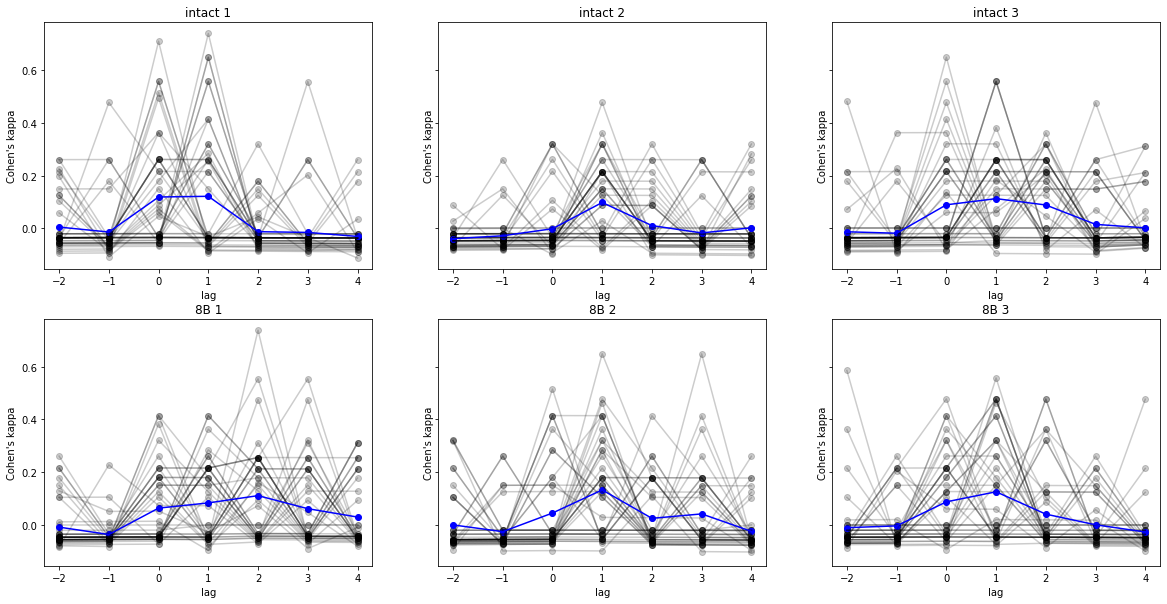

In [37]:
# big loop to show all on one plot

conditions = ['intact', '8B']#, '2B', '1B'] # just want intact and 8B for now
num_stim = 3 # 3 stimuli for each condition

lags = range(-2,5)

# create the figure here
fig, ax = plt.subplots(2, 3, figsize=(20,10), sharey=True)
ax[0,0].set_ylabel("Cohen's kappa")
ax[1,0].set_ylabel("Cohen's kappa")
#fig.tight_layout()

for cond in range(len(conditions)):
    c = conditions[cond]
    
    for n in range(num_stim):
        stim_num = n + 1

        # get the ground truth in array form
        this_gt = gt_periodic[gt_periodic['scram_cond']==c]
        #this_gt = gt_tracked[gt_tracked['scram_cond']==c]
        this_gt = this_gt[this_gt['stim_num']==stim_num]
        gt_array = this_gt['response'].to_numpy()

        # get the data in matrix form
        this_data = data[data['scram_cond']==c]
        this_data = this_data[this_data['stim_num']==stim_num]
        this_data = this_data[this_data['run']==2] # select only run 2
        data_array = this_data['response'].to_numpy()
        data_array = np.reshape(data_array, (subject_ids.shape[0], gt_array.shape[0]))
        
        kappa_values = np.zeros((subject_ids.shape[0],len(lags)))

        for i in range(subject_ids.shape[0]):
            this_sub = data_array[i,:]
    
            for l in range(len(lags)):
                lag = lags[l]
    
                if lag > 0:
                    this_sub_crop = this_sub[lag:]
                    this_gt = gt_array[:-lag]
            
                elif lag < 0:
                    this_sub_crop = this_sub[:lag]
                    this_gt = gt_array[-lag:]
        
                elif lag == 0:
                    this_sub_crop = this_sub
                    this_gt = gt_array
            
                kappa_values[i,l] = cohen_kappa_score(this_sub_crop,this_gt)

                
        #sns.violinplot(data = kappa_values, ax = ax[cond,n])
        for s in range(subject_ids.shape[0]):
            ax[cond,n].plot(lags, kappa_values[s,:], color='black', alpha=0.2)
            ax[cond,n].scatter(lags, kappa_values[s,:], color='black', alpha=0.2)
            
        ax[cond,n].plot(lags, np.mean(kappa_values,axis=0), color='blue')
        ax[cond,n].scatter(lags, np.mean(kappa_values,axis=0), color='blue')
        
        #ax[cond,n].set_xticklabels(lags)
        ax[cond,n].set_xlabel('lag')
        ax[cond,n].set_ylabel("Cohen's kappa")
        ax[cond,n].set_title('%s %d'%(c, stim_num))
        
plt.savefig('plots/less_scrambled_all_lag_kappa_traces.png',dpi=500);